# Detecting Outliers using Z Scores

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [2]:
mall_customers = pd.read_csv('Datasets/Mall_Customers.csv')

## Check the dimensions 

In [3]:
mall_customers.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall_customers.shape

(200, 5)

## Summary of the data

In [5]:
mall_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Check Outliers

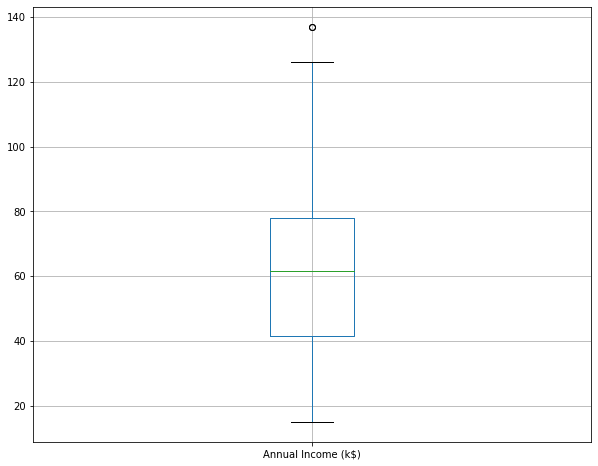

In [6]:
mall_customers.boxplot(figsize=(10,8),
                      column =['Annual Income (k$)'])
plt.show()

In [7]:
mall_customers.loc[mall_customers['Annual Income (k$)'] > 126]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


## Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
scaled_annual_income = scaler.fit_transform(mall_customers['Annual Income (k$)'].values.reshape(-1,1))

In [10]:
scaled_annual_income.shape

(200, 1)

In [11]:
mall_customers['Scaled_Annual_Income'] = scaled_annual_income

In [12]:
mall_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Scaled_Annual_Income
0,1,Male,19,15,39,-1.738999
1,2,Male,21,15,81,-1.738999
2,3,Female,20,16,6,-1.700830
3,4,Female,23,16,77,-1.700830
4,5,Female,31,17,40,-1.662660


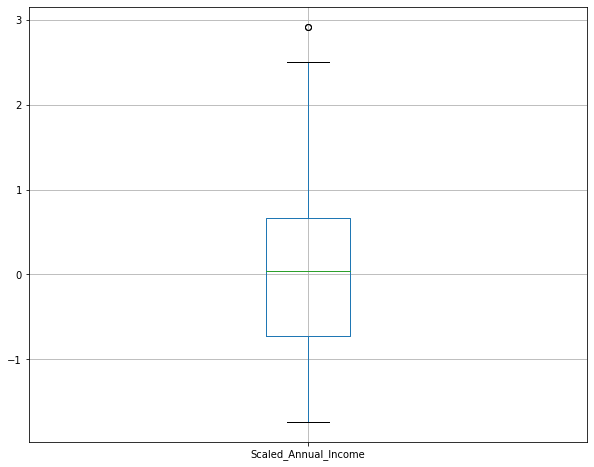

In [13]:
mall_customers.boxplot(figsize=(10,8),
                      column =['Scaled_Annual_Income'])
plt.show()

In [14]:
outliers = np.where(mall_customers['Scaled_Annual_Income'] > 2.8)

In [15]:
outliers

(array([198, 199], dtype=int64),)

In [16]:
mall_customers.iloc[outliers]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Scaled_Annual_Income
198,199,Male,32,137,18,2.917671
199,200,Male,30,137,83,2.917671


In [17]:
costumers_dt_outliers_removed = mall_customers.drop(mall_customers.index[outliers])

In [18]:
costumers_dt_outliers_removed.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Scaled_Annual_Income
193,194,Female,38,113,91,2.001605
194,195,Female,47,120,16,2.268791
195,196,Female,35,120,79,2.268791
196,197,Female,45,126,28,2.497807
197,198,Male,32,126,74,2.497807


## Check Boxplot

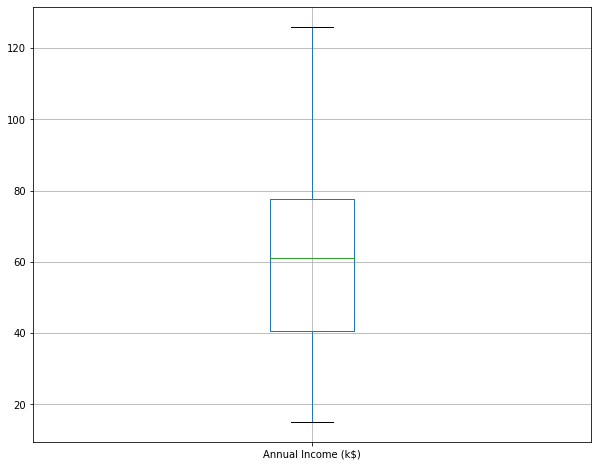

In [19]:
costumers_dt_outliers_removed.boxplot(figsize=(10,8), 
                                      column =['Annual Income (k$)'])
plt.show()